In [2]:
%matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Box plots:
The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of samples, and interquartile range (if you do not know what interquartile range means yet do not worry we shall talk about it later).

Lets create 3 different samples of numpy arrays.
1. Normal distribution sample
    - mean = loc
    - std = scale
    - variance = (scale)^2 
2. Random sample
3. gamma distribution sample(shape,scale=1,size=None)
    - mean = scale x shape
    - variance = scale x shape^2

In [5]:
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

## describe():
We can use pandas describe function to see some summary statistics about our dataframe.

In [6]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.007566,0.502258,1.984159
std,1.012369,0.285854,1.401706
min,-3.674272,0.000019,0.006705
25%,-0.681586,0.256948,0.947204
50%,0.000378,0.502555,1.666773
75%,0.683906,0.750021,2.675851
max,4.318463,0.999987,10.507835


- __count:__ each row has 10000 entries.
- mean,std(standard daviation),min(minimum are given).
- ## Interquartile Range:
    There are three different percentage values. These values makeup interquartile range.
    - min can be said value at 0%.
    - 25% is value at 25% of data.
    - 50% is value at 50% of data.
    - 75% is value at 75% of data.
    - max is value at 100% of data.
    There are 4 different (Equal) quarters of data.
    1. Between min and 25%.
    2. Between 25% and 50%.
    3. Between 50% and 75%.
    4. Between 75% and 100%.

## Back to Box plot
Like standard daviation interquartile range is measure of variability between the data. and it is common to plot this using the box plot.
- In a box plot mean or meadian of data is plotted as a straight line.
- 2 Boxes are formed above one represent 50%-75% quarter of data, below one represent 25%-50% quarter of data.
- Thin lines which are capped are then drawn out to minimum and maximum values.
## boxplot():
We can give a column of dataframe bcz it is a numpy array.
we set whis parameter(position of whiskers) to 'range'(I set it to [0,100] bcz after update this is better).
Here is an example:

<IPython.core.display.Javascript object>


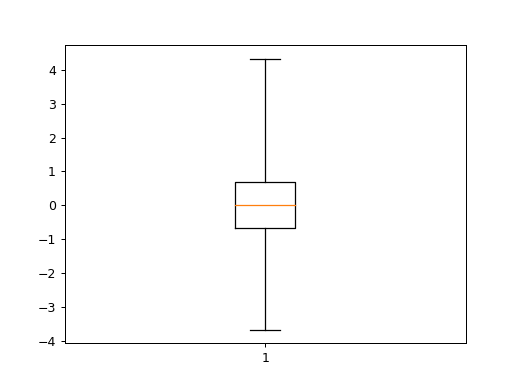

In [16]:
plt.figure()
_=plt.boxplot(df['normal'],whis=[0,100])

### Why we use _ as variable name:
It is a common practise for programmers to use_ as variable name if we just want use a variable one time only and do not need it later. If we did not assign boxplot function a variable name jupyter notebook will try to print out the values which will muddy up our display.

## Passing multiple arrays to a box plot:
We just pass in multiple arrays inside as list and pass that list to box plot function. we can not pass in a dataframe to boxplot function.

<IPython.core.display.Javascript object>


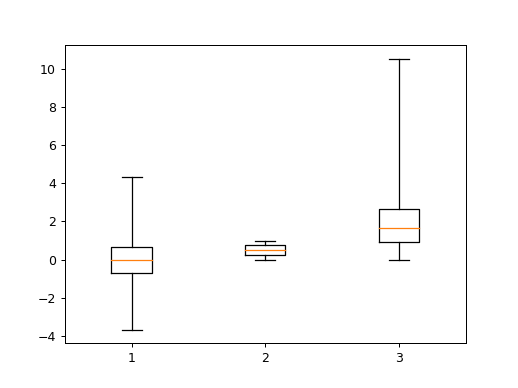

In [18]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])

## gamma distribution:
Lets check out why gamma distribution box plot is the way it is i.e. max values are very far out. we draw a histogram for gamma distribution.

<IPython.core.display.Javascript object>


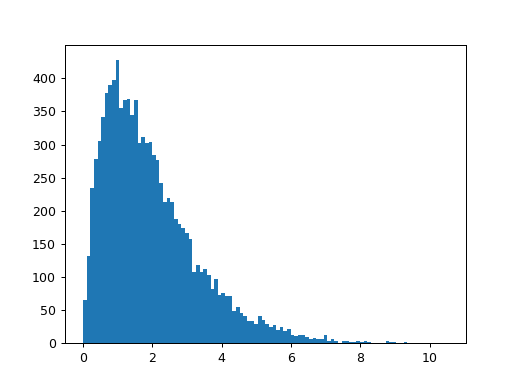

In [20]:
plt.figure()
_=plt.hist(df['gamma'],bins=100)

## inset axes:
We can actually overlay an axes over top of another within a figure. Now this functionality isn't in the basic matplotlib space, but it's in the toolkits, which tend to ship with matplotlib.
### axes grid:
Toolkit we are going to use is calle axes grid


<IPython.core.display.Javascript object>


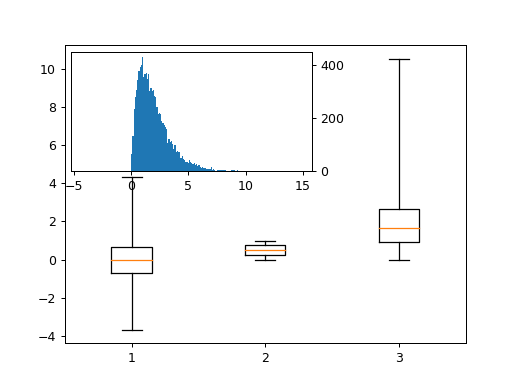

In [31]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=[0,100])
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
_=ax2.hist(df['gamma'], bins=100)
_=ax2.margins(x=0.5)

switch the y axis ticks for ax2 to the right side

In [32]:
_=ax2.yaxis.tick_right()

if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR:Top of box(75%)-Bottom of Box(25%)) whiskers with outliers.
This is one method of detecting outliers and the points which are plotted beyond whiskers are called __fliers__.

<IPython.core.display.Javascript object>


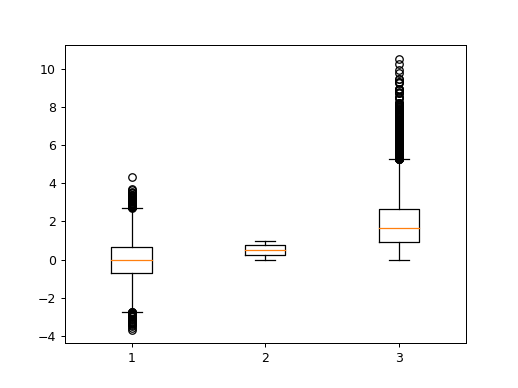

In [33]:
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )